# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### With the real-world high dimensional data, it is important to understand, prepare, and model the dataset to assist a group of car dealers to promote their inventory and car sales   
A serial important steps involves data observation, understanding, cleaning, transformation, plotting, scaling, modeling, evaluation, and recommendation.    
For the data analysis and prediction, several multiple regression models are implemented and compared, including Sequential feature selection, Ridge regularization, and Lasso regularization. Then GridSearchCV is used to optimize the hyperparameter.   
Finally, the best model is provided and the best features are recommended for car dealers to fine-tune the car inventory.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

* The original used_car dataset is from kaggle, and contains 426,000 car information.    
* To explore the dataset to understand the current problems: data types, null values, columns, data outliers, statistic description, and so on.
* Verify the data quality and choose the important data features to analyze

In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
np.set_printoptions(suppress=True )
np.set_printoptions(formatter = {"all": lambda x: str(x)})
pd.options.display.float_format = '{:.5f}'.format

In [2]:
# Read the used car dataset
path = "./data/vehicles.csv"
df_ori = pd.read_csv(path)
df = df_ori.copy()

In [3]:
# Check the dataset
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
# Check the dataset columns
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [5]:
# dataset description
df.describe()

,id,price,year,odometer
count,426880.00000,426880.00000,425675.00000,422480.00000
mean,7311486634.22433,75199.03319,2011.23519,98043.33144
std,4473170.41256,12182282.17360,9.45212,213881.50080
min,7207408119.00000,0.00000,1900.00000,0.00000
25%,7308143339.25000,5900.00000,2008.00000,37704.00000
50%,7312620821.00000,13950.00000,2013.00000,85548.00000
75%,7315253543.50000,26485.75000,2017.00000,133542.50000
max,7317101084.00000,3736928711.00000,2022.00000,10000000.00000


In [6]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [7]:
# dataset null values
df.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

### Data observations:   
* There are total 18 columns, including 4 numeric and 14 non-numeric data types:   
 * id and price: int64   
 * year and odometer: float64
 * other columns: object   
    
* Statistic description indicates:   
 * The minimal price is 0 which is too low and the maximal price is more than 3,000,000,000 which is too high.   
 * The maximal odometer is more than 10,000,000 which is too high to be realistic.
 * The minimal year is 1900 which is too old.
    
* High ratio of null values:
 * Several columns (e.g., condition, cylinders, VIN, drive, size, paint_color) contain a large number of null values   
 * To optimize the data analysis and keep valuable information, it is required to fill null values instead of deleting them   
---

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Data Cleaning   
* Drop null values in the selective columns: year, model, fuel, odometer, title_status, transmission, manufacturer, since these columns contain low ratio null values.   
* Fill null values in the high ratio columns   
* Keep important features (columns)


In [10]:
# Drop null values in the selective columns: year, model, fuel, odometer, title_status, transmission, manufacturer
df_dropna1 = df.dropna(subset = ["year","model","fuel","odometer","title_status","transmission", "manufacturer"]).reset_index(drop =True)

In [9]:
df_dropna1.isna().sum()

id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition       157282
cylinders       161353
fuel                 0
odometer             0
title_status         0
transmission         0
VIN             145862
drive           115076
size            277331
type             82628
paint_color     112494
state                0
dtype: int64

In [11]:
df_dropna1.shape

(389604, 18)

In [12]:
df_dropna2 = df_dropna1.copy()

In [13]:
# Fill null values in the high ratio columns 
df_dropna2.drop(columns = ["id", "cylinders", "VIN", "drive", "size", "paint_color","model","fuel",
                           "transmission","state", "region"], inplace = True)

In [14]:
df_dropna2.fillna("unknown", inplace = True)

In [15]:
df_dropna2.isna().sum()

price           0
year            0
manufacturer    0
condition       0
odometer        0
title_status    0
type            0
dtype: int64

In [16]:
df_dropna2.head()

,price,year,manufacturer,condition,odometer,title_status,type
0,33590,2014.00000,gmc,good,57923.00000,clean,pickup
1,22590,2010.00000,chevrolet,good,71229.00000,clean,pickup
2,39590,2020.00000,chevrolet,good,19160.00000,clean,pickup
3,30990,2017.00000,toyota,good,41124.00000,clean,pickup
4,15000,2013.00000,ford,excellent,128000.00000,clean,truck


---

### Top 10 Manufacturers

In [18]:
df_top = df_dropna2.copy()

In [19]:
# Make top_10 manufacturer list
top_10 = df_top["manufacturer"].value_counts().index[:10]

In [20]:
# Keep top_10 manufacturers
df_top10 = df_top[df_top["manufacturer"].isin(top_10)]

In [21]:
df_top10["manufacturer"].value_counts()

ford         67811
chevrolet    52326
toyota       32509
honda        20407
jeep         18150
nissan       18053
ram          16770
gmc          15941
bmw          14224
dodge        12864
Name: manufacturer, dtype: int64

In [22]:
df_top10.shape

(269055, 7)

In [23]:
# Rename the unknown type as type_unknown
df_top10.loc[:,"type"] = df_top10.loc[:,"type"].apply(lambda x: "type_unknown" if x == "unknown" else x)

### Plotting

In [24]:
df_top10.head(1)

,price,year,manufacturer,condition,odometer,title_status,type
0,33590,2014.00000,gmc,good,57923.00000,clean,pickup


In [25]:
# Define bar_pie plotting function

def plot_bar_pie(column):
    x = df_top10[column].value_counts().index
    y = df_top10[column].value_counts().values
    color = ["green","red","purple","blue","cyan","orange","lightblue","grey", 
             "yellow","black","tomato","violet","lightGray","SlateBlue"]
    explode = [0.1,0,0,0,0,0.2,0,0,0,0,0,0,0,0]
    fig, ax = plt.subplots(nrows =1, ncols = 2, figsize = (15,7))
    bar_plot=ax[0].bar(x,y, color = random.sample(color, k = x.size),label=x)
    ax[0].bar_label(bar_plot)
    ax[0].set_title(f"number of {column}")
    ax[1].pie(y, autopct="%.2f%%",labels=x, explode=random.sample(explode, k = x.size),shadow=True,radius=1.1)
    ax[1].set_title(f"% of {column}",bbox={"facecolor":"0.9","pad":10},y=1.1)
    fig.tight_layout(pad=5)

#### Top 10 Manufacturers Plot

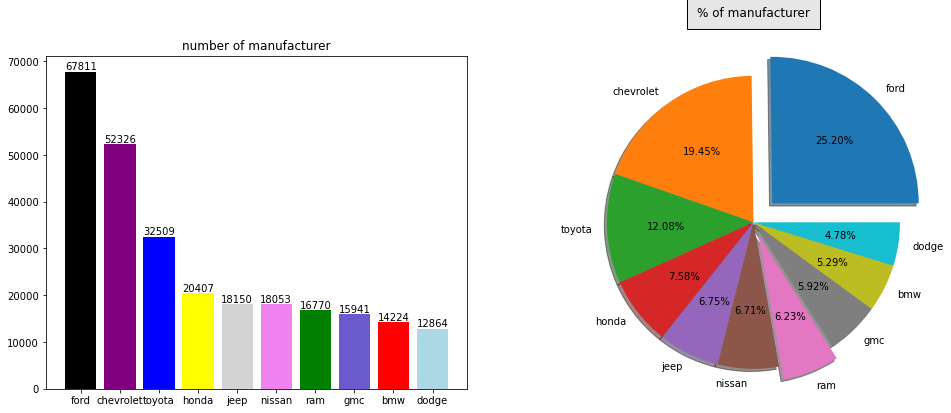

In [26]:
# Plot top 10 manufacturers
plot_bar_pie("manufacturer")

#### Condition Plot

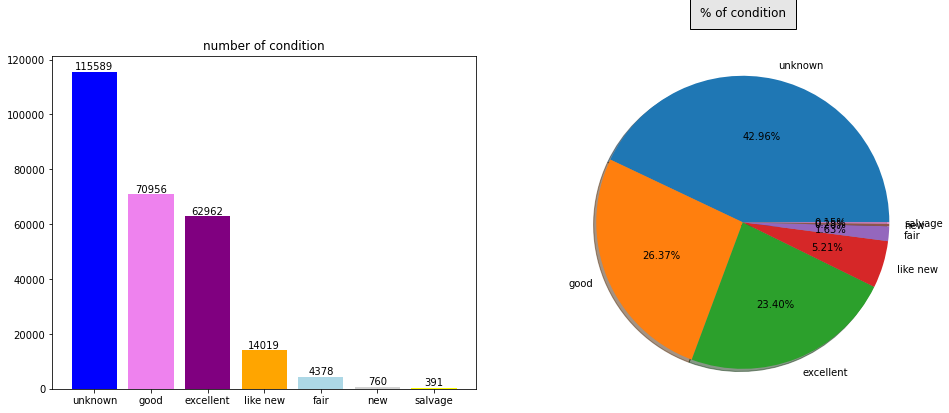

In [27]:
plot_bar_pie("condition")

#### Type Plot

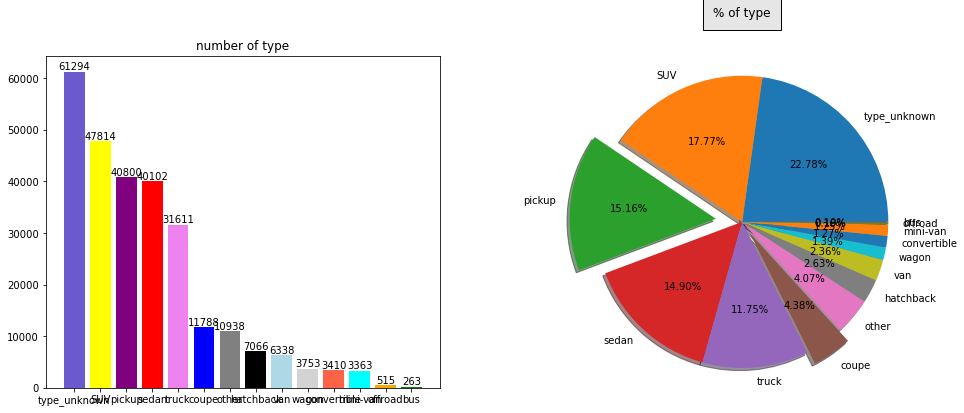

In [28]:
plot_bar_pie("type")

#### Title Status Plot

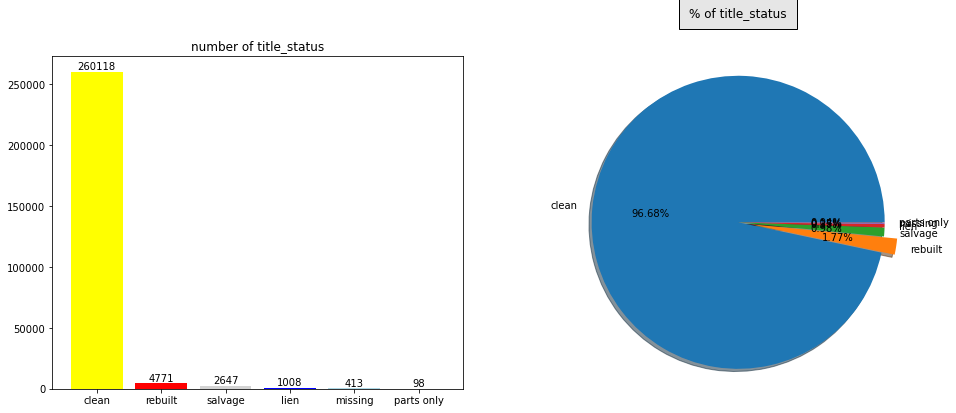

In [29]:
plot_bar_pie("title_status")

### Remove Data Outliers

In [30]:
df_reasonable = df_top10.copy()

In [31]:
# Remove price outliers
df_reasonable = df_reasonable.drop(
    df_reasonable[(df_reasonable["price"] < 1000) | (df_reasonable["price"] > 100000)].index,
).reset_index(drop=True)

In [32]:
# Remove odometer outliers
df_reasonable = df_reasonable.drop(
    df_reasonable[df_reasonable["odometer"] > 200000].index
).reset_index(drop = True)

#### Year Histogram Plot

In [33]:
# Define histogram plotting
def my_hist(frame, column):
    frame.plot(y = column, kind= "hist", 
               bins = np.linspace(frame[column].min(),frame[column].max(),15),
               color = "orange", edgecolor = "blue",
              grid = True, xlabel = f"number of {column}", title = f"{column}", figsize = (15,7))

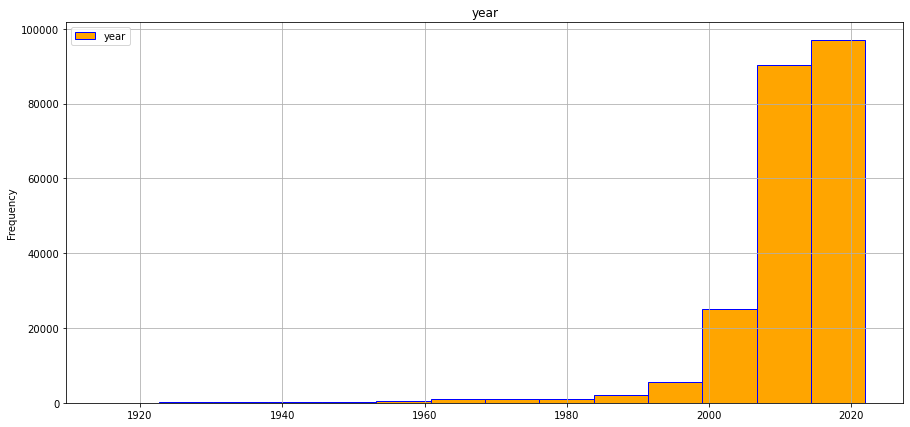

In [35]:
my_hist(df_reasonable, "year")

#### Price Histogram Plot

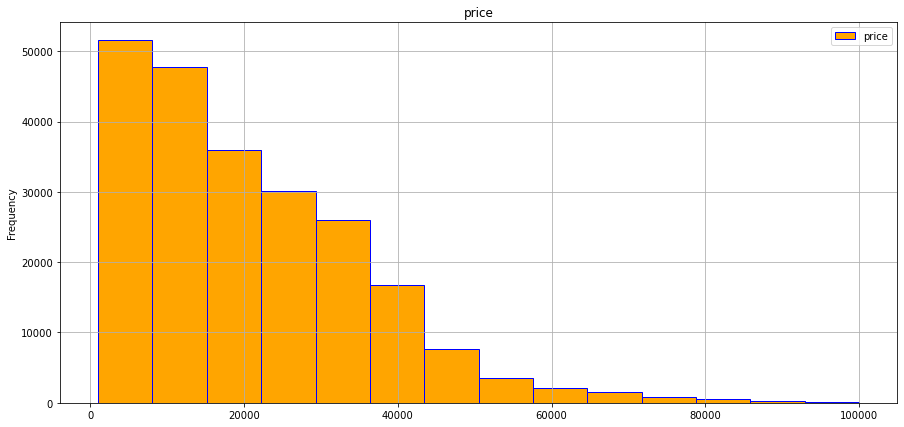

In [36]:
my_hist(df_reasonable, "price")

#### Odometer Histogram Plot

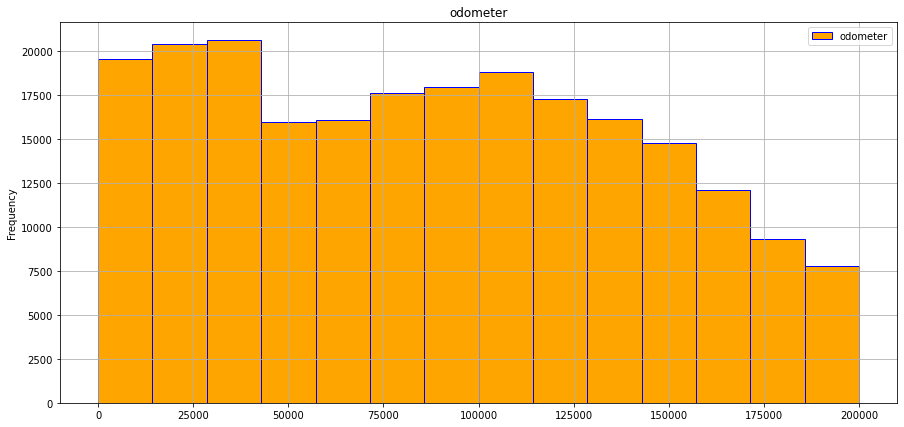

In [37]:
my_hist(df_reasonable, "odometer")

#### Top 10 Manufacturers Scatter Plot

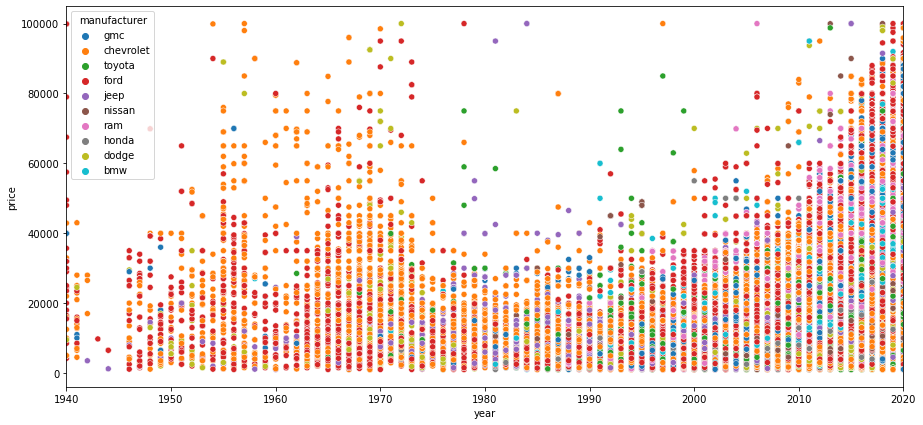

In [38]:
plt.figure(figsize = (15,7))
sns.scatterplot(x = "year", y= "price", data = df_reasonable, hue = "manufacturer")
plt.xlim(1940,2020)
plt.show()

### Data Preparation Results   
* After dropna(), dataframe keeps more than 90% data (389,000 of 426,000 rows)   
* Fill null values with 'unknown' in the high ratio columns   
* Ensure the number of null values is zero   
* Keep important columns (price, year, manufacturer, condition, odometer, title_status, type).  
* keep top 10 manufacturers since they take 70% of data   
* Rename the unknown type as 'type_unknown' to avoid the same name.  
* Remove data outliers: price, year, odometer   
* Plotting:   
 * Bar and Pie plots: Top 10 Manufacturers, condition, type, title status   
 * Histogram plots: year, price, odometer   
 * Scatter plot: Top 10 Manufacturers
 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Data Transformation   
For current high-dimensinal datasets, it is required to transform non-numeric features using get_dummies function

In [39]:
df_small = df_reasonable.copy()

In [40]:
df_small

,price,year,manufacturer,condition,odometer,title_status,type
0,33590,2014.00000,gmc,good,57923.00000,clean,pickup
1,22590,2010.00000,chevrolet,good,71229.00000,clean,pickup
2,39590,2020.00000,chevrolet,good,19160.00000,clean,pickup
3,30990,2017.00000,toyota,good,41124.00000,clean,pickup
4,15000,2013.00000,ford,excellent,128000.00000,clean,truck
...,...,...,...,...,...,...,...
224386,5477,2003.00000,nissan,unknown,168055.00000,clean,SUV
224387,41990,2019.00000,toyota,good,36630.00000,clean,SUV
224388,29590,2016.00000,toyota,good,53475.00000,clean,SUV
224389,23590,2019.00000,nissan,good,32226.00000,clean,sedan


### Non-Numeric Features

In [41]:
# One-hot encoding 
dummy1 = pd.get_dummies(df_small['manufacturer'])
#dummy2 = pd.get_dummies(df_small['type'])
#dummy3 = pd.get_dummies(df_small['title_status'])
dummy4 = pd.get_dummies(df_small['condition'])

In [42]:
# Reorganize the table
df_small_dummy = \
pd.concat( [df_small.drop(columns = ["manufacturer", "condition" , "type", "title_status"]),
            dummy1, dummy4],# dummy3, dummy4] ,
            axis = 1)

In [43]:
df_small_dummy.head()

,price,year,odometer,bmw,chevrolet,dodge,ford,gmc,honda,jeep,nissan,ram,toyota,excellent,fair,good,like new,new,salvage,unknown
0,33590,2014.00000,57923.00000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,22590,2010.00000,71229.00000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,39590,2020.00000,19160.00000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,30990,2017.00000,41124.00000,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,15000,2013.00000,128000.00000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


### Training and Testing Sets

In [44]:
df3 = df_small_dummy.copy()

In [45]:
X = df3.drop('price', axis = 1)
y = df3['price']


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### y_log

In [47]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
y_train_log

127641    8.44462
183593   10.34142
106976    9.98967
148542    9.34923
68980     7.17012
           ...   
119879   10.54489
103694    8.85295
131932    8.07091
146867    9.85167
121958    9.76996
Name: price, Length: 157073, dtype: float64

### Sequential Feature Selection

In [48]:
selector_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                         ('model', LinearRegression())])
selector_pipe

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression())),
                ('model', LinearRegression())])

In [49]:
# Sequential Feature Selection, GridSearchCV, and Train MSE, Test MSE
param_dict = {}
selector_grid = ''
selector_train_mse = ''
selector_test_mse = ''

param_dict = {'selector__n_features_to_select': [2, 3, 4, 5]}
selector_grid = GridSearchCV(selector_pipe, param_grid=param_dict)
selector_grid.fit(X_train, y_train_log)
train_preds = selector_grid.predict(X_train)
test_preds = selector_grid.predict(X_test)
selector_train_mse = mean_squared_error(y_train_log, train_preds)
selector_test_mse = mean_squared_error(y_test_log, test_preds)

print(f'Train MSE: {selector_train_mse}')
print(f'Test MSE: {selector_test_mse}')

Train MSE: 0.37687150894133786
Test MSE: 0.37689044656637577


### Ridge Regularization

In [50]:
# Ridge Selection, GridSearchCV, and Train MSE, Test MSE
ridge_param_dict = ''
ridge_pipe = ''
ridge_grid = ''
ridge_train_mse = ''
ridge_test_mse = ''

ridge_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train_log)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train_log, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test_log, ridge_test_preds)

print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
ridge_pipe

Train MSE: 0.3523588130447177
Test MSE: 0.35289110499214743


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

## Best Model and Best Features

In [51]:
# Best model selection and best features
best_estimator = ''
best_selector = ''
best_model = ''
feature_names = ''
coefs = ''

best_estimator = selector_grid.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = selector_grid.best_estimator_.named_steps['model']
feature_names = X_train.columns[best_selector.get_support()]
coefs = best_model.coef_

print(best_estimator)
print(f'Features from best selector: {feature_names}.')
print('Coefficient values: ')
print('===================')
pd.DataFrame([coefs.T], columns = feature_names, index = ['model'])

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('model', LinearRegression())])
Features from best selector: Index(['year', 'odometer', 'honda', 'nissan', 'ram'], dtype='object').
Coefficient values: 


,year,odometer,honda,nissan,ram
model,0.02527,-0.00001,-0.39133,-0.45226,0.42833


---

### LASSO Regression

In [52]:
df_lasso = df_small_dummy.copy().sample(10000)
df_lasso = df_lasso.iloc[:, 0:7]
df_lasso

,price,year,odometer,bmw,chevrolet,dodge,ford
224353,15999,2018.00000,36465.00000,0,1,0,0
113990,10800,2013.00000,65000.00000,0,0,0,0
77192,37750,2021.00000,1038.00000,0,0,0,1
193065,4250,2009.00000,189000.00000,0,0,0,0
56516,10998,2017.00000,91000.00000,0,0,0,0
...,...,...,...,...,...,...,...
69157,10500,2001.00000,194000.00000,0,0,0,0
124481,17500,2017.00000,115133.00000,0,0,0,1
68155,15980,2020.00000,10692.00000,0,1,0,0
207139,18998,2014.00000,110482.00000,0,0,0,0


In [53]:
X = df_lasso.drop('price', axis = 1)
y = df_lasso['price']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# Lasso Regularization
auto_pipe = ''
lasso_coefs = ''

auto_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42, tol = 1))])
auto_pipe.fit(X_train, y_train)
lasso_coefs = auto_pipe.named_steps['lasso'].coef_

print(type(lasso_coefs))
print(lasso_coefs)
auto_pipe

<class 'numpy.ndarray'>
[5409.517010553563 -7075.00440621548 -438.7844949824469 516.3623650149539
 -1013.7835168715433 1016.2672105232671 -1974.9452073928144
 -669.1421082474468 189.55636698834948 -42.52644787336793
 130.47298732956148 -1.4740923795067826 770.2310411025865
 -462.84535182788983 -300.42099953928954 -252.9701772709826
 -263.0467054545842 393.01578231192514 0.0 0.0 0.0 195.64420894973156 0.0
 0.0 188.4799048985349 0.0 171.2114729619789 -5.051340006477084
 -494.728404900895 24.06550226135375 41.68971899497318 21.536336550647388
 22.684526991253627 694.7371509992245 -343.64009739734786
 -228.95828509900693 -188.0960944129389 -186.46251790071005
 311.37398461822517 0.0 0.0 0.0 160.3084478985417 0.0 0.0
 148.48652499410008 0.0 126.28230129034388 654.3616066183142
 -218.50100676135838 -81.28179308185797 -49.4333048408285
 17.505066521700858 -64.05755297422964 0.0 0.0 0.0 -180.5739689930312 0.0
 0.0 -135.75797846041326 0.0 -310.2649205730005 236.91028571884036 0.0 0.0
 0.0 0.0 0

Pipeline(steps=[('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(random_state=42, tol=1))])

### Modeling Conclusion   
The current used car dataset is high-dimensional and contains polynomial features.
Before applying multiple regression models, it is required to transform non-numeric features using get_dummies function and scale the data for the best results.   
For processing training and testing sets, as the squared error will increase the price difference, it is necessary to use numpy.log function to rescale price (y sets)   
Sequential feature selection (greedy algorithm) and GridSearchCV are used to process the hyperparameter and produced the Train MSE (0.3768) and Test MSE (0.3768)   
Ridge regularization is faster than Lasso regularization and more numerically stable. For this dataset, Ridge showed Train MSE (0.352) and Test MSE (0.353)   
Lasso regularization automatically performs feature selection   
After the comparison, the best model is Sequential feature selection and the best 5 features are: year, odometer, honda, nissan, ram

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### To increase the data quality and model prediction   
* Data cleaning and preparation is implemented to remove outliers, fill null values, keep important features   
* Top 10 manufacturers are kept to analyze the main market
* Several types of plotting provides valuable information: market percentage, year and odometer histogram   
* Model selection requires non-numeric features, standarization, and pice log transformation  
* Three models (Sequential feature selection, Ridge regularization, Lasso regularization) were processed,and GridSearchCV is used to optimize the hyperparameter   
* The best model is sequential feature selection and the best 5 features are: year, odometer, honda, nissan, ram

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

##### In this report, the real-world used car dataset is analyzed using multiple regression models to provide valuable information for the car dealers. 
To investigate the best factors to affect the car price, important steps are implemented: 
* Data observation indicates that there are mixed data types of columns and unrealistic outlier numbers for price, year and odometers. Moreover, high ratio of null values will affect the data quality. 
* Therefore, in order to understand the used car market, the dataset is cleaned and transformed with the 
data cleaning and preparation methods, and the null values are replaced with 'unknown'.   
* Since the top 10 manufacturers takes about 70% of the business data, it is important to focus the analysis into this field.      
* Different types of plotting provide general and statistic pictures for the main market, which can also help to increase the total data quality. 
   
The real-world data demonstrates high-dimensional and polynomial features. After comparing several multiple regression models, the powerful machine learning choosed the sequential feature selection as the best model, and recommended 5 best features: year, odometer, honda, nissan, ram. 
The final results demonstrated that: among all the factors, the most important feature is the year to affect the car price, the newer the better, secondly the lower odometer, the higher the price. Then in the top 10 brands, the honda and nissan keep the highest car values.


---